## Final Project Submission

Please fill out:
* Student name: Faith Mumbi Githaiga
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


INTRODUCTION:

The dataset under analysis contains records of aviation accidents in the United States spanning from 1962 to 2022. This data has been sourced from the National Transportation Safety Board(NTSB) ,which is the agency responsible for investigating aviation incidents.

The steps followed will include;
1. Data Mining- this will include sourcing of the data which is in form of csv.
2. Data Preparation- this is the exploration of the data ie be familiar with the number of rows and columns, information about the dataset.
3. Data Cleaning- this is dealing with duplicates,missing values.
4. Data Analysis  and Visualization-Exploratory Data Analysis(EDA) and graphical presentation of the data.


In [1]:
# Your code here - remember to use markdown cells for comments as well!

#Import Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. DATA MINING

In [2]:
# Load the dataset
Aviation_df=pd.read_csv('data/Aviation_Data.csv', low_memory=False)

#check the first few rows to confirm if it loaded correctly
print(Aviation_df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

2. DATA PREPARATION

In [3]:
# Number of rows and columns

Aviation_df.shape

(90348, 31)

In [4]:
# Information about the dataset

Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

There are missing values in the DataFrame by comparing the "Non-Null Count" for each column against the total number of entries which is (90348). 

In [5]:
# The datatypes of the data in the columns
Aviation_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
# Summary ststistics about the dataset
Aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


3. DATA CLEANING

In [7]:
#Check for missing Values
missing_values=Aviation_df.isnull().sum()

#Displaying columns with missing values
print(missing_values)

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [8]:
# Check for duplicate values
Aviation_df_Duplicates = Aviation_df.duplicated().value_counts()

#Displaying columns with duplicate values
print(Aviation_df_Duplicates)


False    88958
True      1390
dtype: int64


In [9]:
# Make a copy of the original DataFrame
Aviation_df_clean = Aviation_df.copy()

# Fill categorical columns with 'Unknown'
cat_cols = [
    'Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Country', 
    'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'Registration.Number',
    'Make', 'Model', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 
    'Air.carrier', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'
]
Aviation_df_clean[cat_cols] = Aviation_df_clean[cat_cols].fillna('Unknown')

# Convert numeric columns to appropriate data types (to handle text values)
numeric_cols = [
    'Latitude', 'Longitude', 'Number.of.Engines', 'Total.Fatal.Injuries', 
    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'
]
for col in numeric_cols:
    Aviation_df_clean[col] = pd.to_numeric(Aviation_df_clean[col], errors='coerce')

# Fill missing numeric values with median
num_cols_to_fill = [
    'Latitude', 'Longitude', 'Number.of.Engines', 'Total.Fatal.Injuries', 
    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'
]
for col in num_cols_to_fill:
    Aviation_df_clean[col].fillna(Aviation_df_clean[col].median(), inplace=True)

# Fill missing values using mode (for categorical variables with frequent values)
mode_cols = [
    'Injury.Severity', 'Aircraft.damage', 'Amateur.Built', 'Engine.Type', 'Weather.Condition'
]
for col in mode_cols:
    if not Aviation_df_clean[col].mode().empty:  # Ensure mode exists
        Aviation_df_clean[col].fillna(Aviation_df_clean[col].mode()[0], inplace=True)


# Check the info of the cleaned dataframe
print(Aviation_df_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                90348 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         90348 non-null  object 
 3   Event.Date              90348 non-null  object 
 4   Location                90348 non-null  object 
 5   Country                 90348 non-null  object 
 6   Latitude                90348 non-null  float64
 7   Longitude               90348 non-null  float64
 8   Airport.Code            90348 non-null  object 
 9   Airport.Name            90348 non-null  object 
 10  Injury.Severity         90348 non-null  object 
 11  Aircraft.damage         90348 non-null  object 
 12  Aircraft.Category       90348 non-null  object 
 13  Registration.Number     90348 non-null  object 
 14  Make                    90348 non-null

In [10]:
# Display the first few rows of the cleaned DataFrame
print(Aviation_df_clean.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States  38.167361 -95.478611      Unknown   
1   BRIDGEPORT, CA  United States  38.167361 -95.478611      Unknown   
2    Saltville, VA  United States  36.922223 -81.878056      Unknown   
3       EUREKA, CA  United States  38.167361 -95.478611      Unknown   
4       Canton, OH  United States  38.167361 -95.478611      Unknown   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0      Unknown  ...          Personal     Unknown                  2.0   
1      Unk

In [11]:
# Handling Duplicates
# Remove duplicate rows
Aviation_df_Clean = Aviation_df.drop_duplicates()

# Check if duplicates remain
print(Aviation_df_Clean.duplicated().sum())


0


4.DATA VISUALIZATION

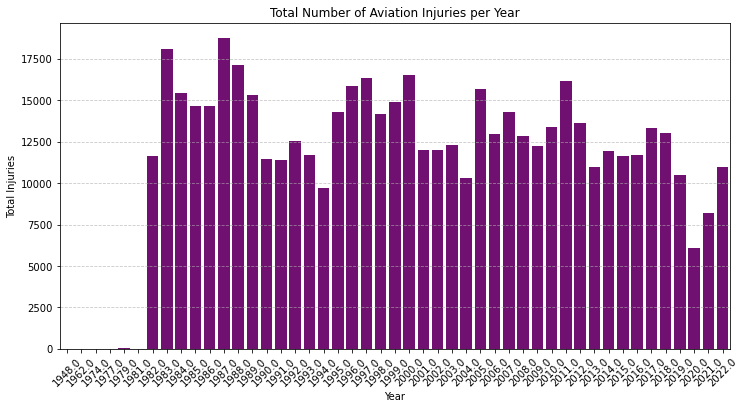

In [73]:
# Total number of Aviation injuries per year since 1962


# Ensure 'Event.Date' is in datetime format
Aviation_df['Event.Date'] = pd.to_datetime(Aviation_df['Event.Date'], errors='coerce')

# Extract the Year
Aviation_df['Year'] = Aviation_df['Event.Date'].dt.year

# Sum all injury columns per year
injuries_per_year = Aviation_df.groupby('Year')[['Total.Fatal.Injuries', 
                                                  'Total.Serious.Injuries', 
                                                  'Total.Minor.Injuries', 
                                                  'Total.Uninjured']].sum()

# Calculate total injuries per year
injuries_per_year['Total.Injuries'] = injuries_per_year.sum(axis=1)

# Reset index for plotting
injuries_per_year = injuries_per_year.reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=injuries_per_year, x='Year', y='Total.Injuries', color='purple')

# Customize the chart
plt.title('Total Number of Aviation Injuries per Year')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.show()


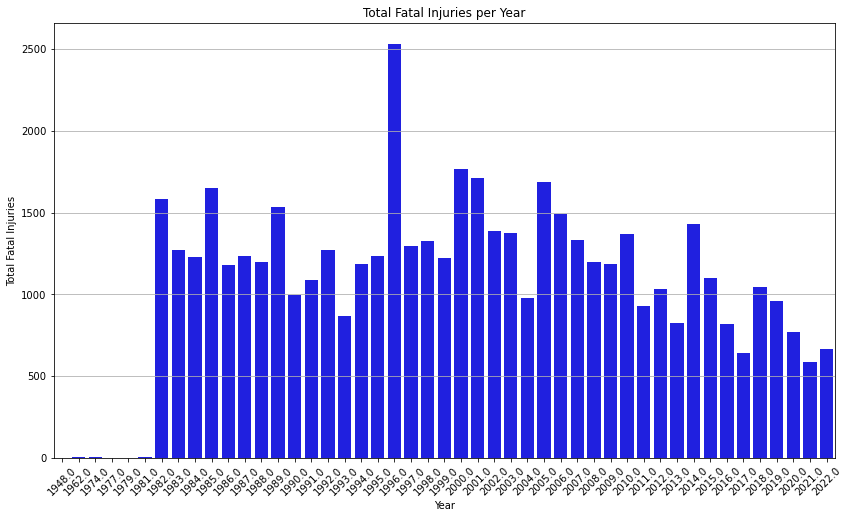

In [77]:
# Total number of Fatal Injuries per year

# Convert the 'Event.Date' column to datetime format
Aviation_df_clean['Event.Date'] = pd.to_datetime(Aviation_df_clean['Event.Date'], errors='coerce')

# Extract the year from the Event.Date
Aviation_df_clean['Year'] = Aviation_df_clean['Event.Date'].dt.year

# Fill missing values with 0 for the Total Fatal Injuries column
Aviation_df_clean['Total.Fatal.Injuries'] = Aviation_df_clean['Total.Fatal.Injuries'].fillna(0)

# Group by Year and sum the total fatal injuries
fatal_injuries_per_year = Aviation_df_clean.groupby('Year').agg({
    'Total.Fatal.Injuries': 'sum'
}).reset_index()

# Sort the DataFrame by Year for better visualization
fatal_injuries_per_year = fatal_injuries_per_year.sort_values(by='Year')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=fatal_injuries_per_year, x='Year', y='Total.Fatal.Injuries', color='blue') 
plt.title('Total Fatal Injuries per Year')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

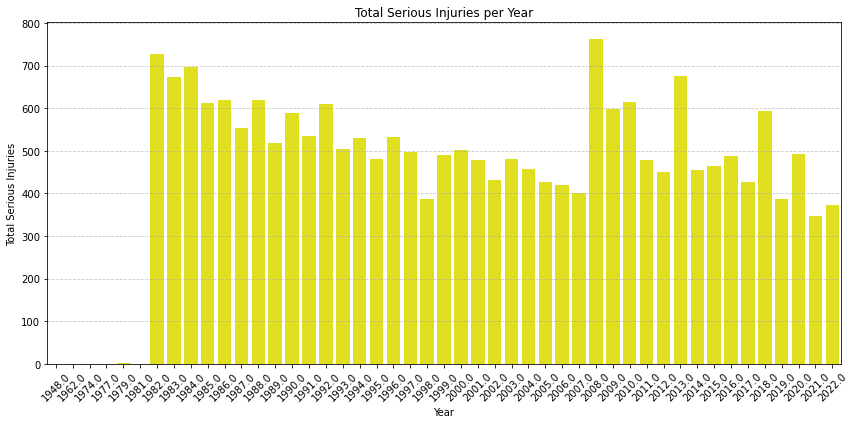

In [15]:
# Total number of Serious Injuries per year


# Ensure 'Event.Date' is in datetime format
Aviation_df['Event.Date'] = pd.to_datetime(Aviation_df['Event.Date'], errors='coerce')

# Extract the Year
Aviation_df['Year'] = Aviation_df['Event.Date'].dt.year

# Group data by Year and sum serious injuries
serious_injuries_per_year = Aviation_df.groupby('Year', as_index=False)['Total.Serious.Injuries'].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=serious_injuries_per_year, x='Year', y='Total.Serious.Injuries', color='yellow')

# Customize the chart
plt.title('Total Serious Injuries per Year')
plt.xlabel('Year')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


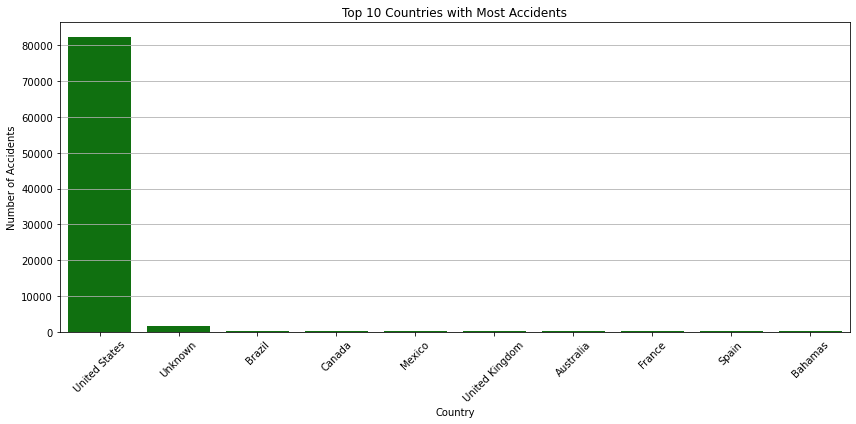

In [17]:
# Accidents by country

# Count the number of accidents by Country
accidents_by_country = Aviation_df_clean['Country'].value_counts().reset_index()
accidents_by_country.columns = ['Country', 'Count']

# Sort the DataFrame by Count and select the top 10 countries
accidents_by_country = accidents_by_country.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=accidents_by_country, x='Country', y='Count', color='green') 
plt.title('Top 10 Countries with Most Accidents')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

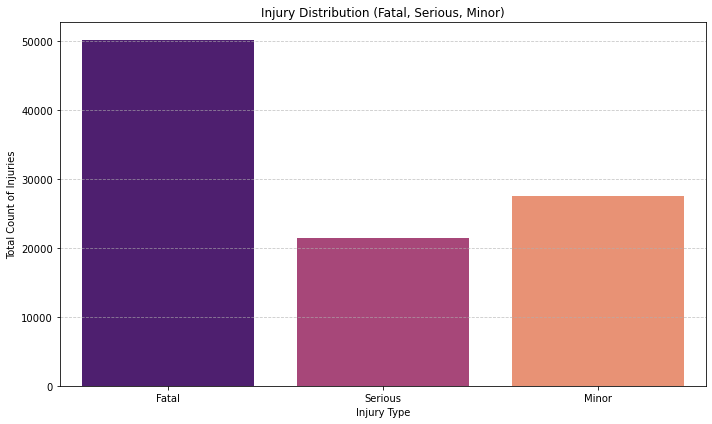

In [32]:
# Injury distribution(Fatal,Serious,Minor)


# Aggregate injury counts
injury_distribution = {
    'Injury Type': ['Fatal', 'Serious', 'Minor'],
    'Count': [
        Aviation_df['Total.Fatal.Injuries'].sum(),
        Aviation_df['Total.Serious.Injuries'].sum(),
        Aviation_df['Total.Minor.Injuries'].sum()
    ]
}

# Convert to DataFrame
injury_distribution_df = pd.DataFrame(injury_distribution)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=injury_distribution_df, x='Injury Type', y='Count', palette='magma')

# Customize the chart
plt.title('Injury Distribution (Fatal, Serious, Minor)')
plt.xlabel('Injury Type')
plt.ylabel('Total Count of Injuries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


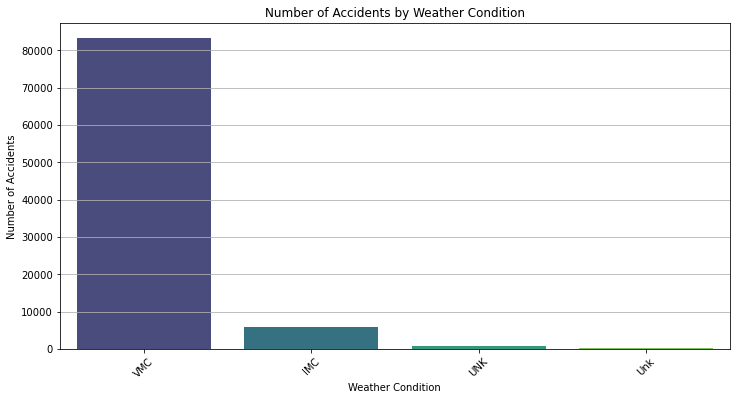

In [34]:
# Weather Conditions Impact on Accidents
#Plot
weather_accidents = Aviation_df_clean['Weather.Condition'].value_counts().reset_index()
weather_accidents.columns = ['Weather Condition', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_accidents, x='Weather Condition', y='Count', palette='viridis')

plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

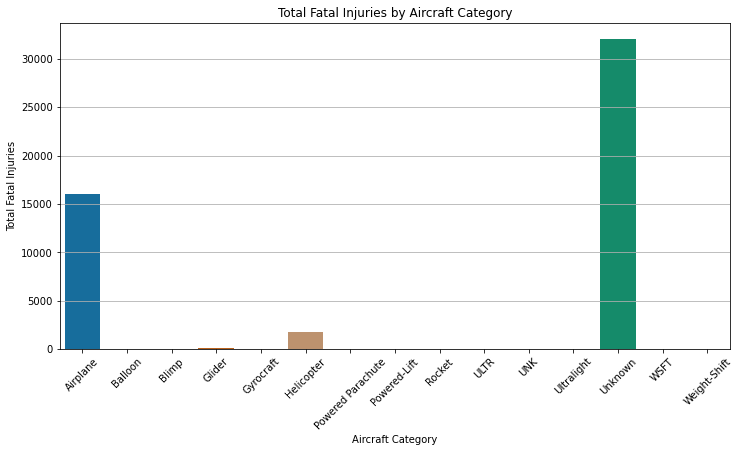

In [36]:
# Aircraft Category vs. Total Fatal Injuries

#Plot
fatal_injuries_by_category = Aviation_df_clean.groupby('Aircraft.Category')['Total.Fatal.Injuries'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fatal_injuries_by_category, x='Aircraft.Category', y='Total.Fatal.Injuries', palette='colorblind')
plt.title('Total Fatal Injuries by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

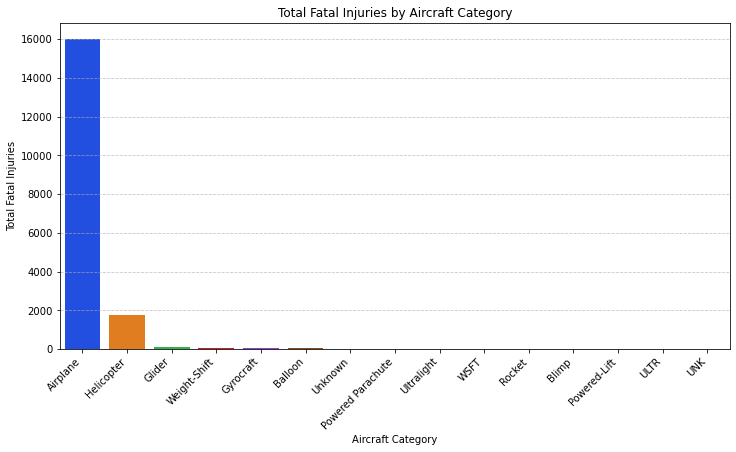

In [29]:
# Injury Distribution by Aircraft Type


# Group by 'Aircraft.Category' and sum 'Total.Fatal.Injuries'
fatal_injuries_by_category = Aviation_df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].sum().reset_index()

# Sort values for better visualization
fatal_injuries_by_category = fatal_injuries_by_category.sort_values(by='Total.Fatal.Injuries', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=fatal_injuries_by_category, x='Aircraft.Category', y='Total.Fatal.Injuries', palette='bright')

# Customize the chart
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Aircraft Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



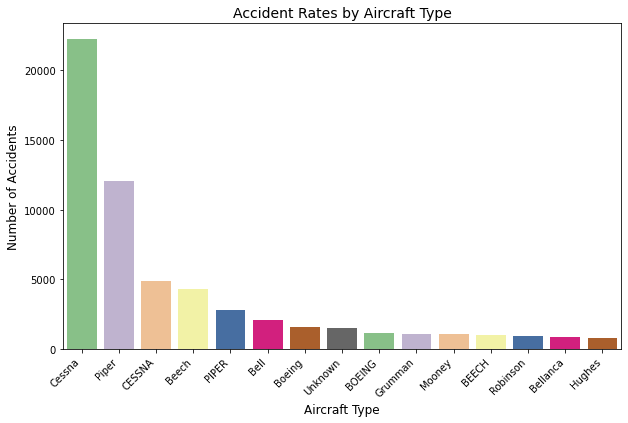

In [69]:
# Accident Rates by Aircraft 

# Count the number of accidents by Aircraft Type (Make)
accident_counts = Aviation_df_clean['Make'].value_counts().reset_index()
accident_counts.columns = ['Aircraft Type', 'Number of Accidents']

# Select the top 15 aircraft types with the most accidents
top_aircraft = accident_counts.head(15)

# Plotting as a bar chart for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_aircraft, x='Aircraft Type', y='Number of Accidents', palette="Accent")

# Titles and labels
plt.title('Accident Rates by Aircraft Type', fontsize=14)
plt.xlabel('Aircraft Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels to improve readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



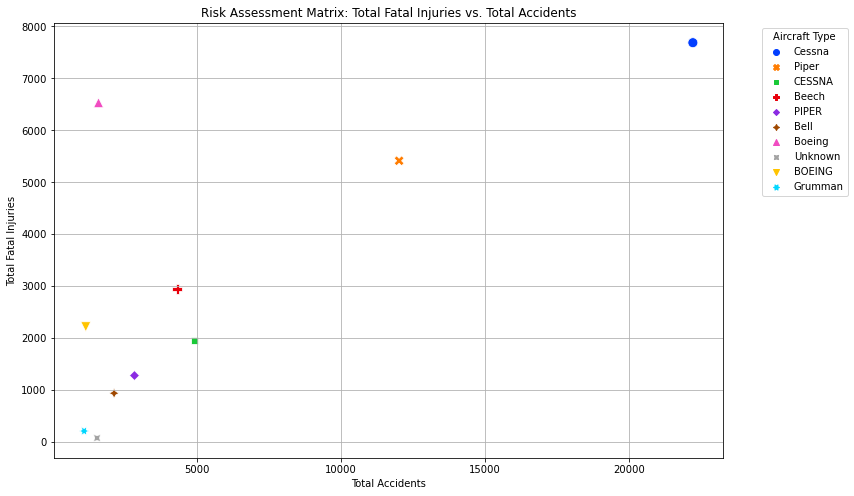

In [67]:
# Risk Assessment Matrix 

# Aircraft Type and sum the total injuries and accidents
risk_assessment = Aviation_df_clean.groupby('Make').agg({
    'Total.Fatal.Injuries': 'sum',
    'Event.Id': 'count' 
}).reset_index()

# Renaming of columns for clarity
risk_assessment.columns = ['Aircraft Type', 'Total Fatal Injuries', 'Total Accidents']

# Limit to top N aircraft types based on total accidents
top_n = 10
risk_assessment = risk_assessment.nlargest(top_n, 'Total Accidents')

# Scatter plot
plt.figure(figsize=(12, 8))  
sns.scatterplot(data=risk_assessment, x='Total Accidents', y='Total Fatal Injuries', hue='Aircraft Type', style='Aircraft Type', s=100, palette='bright')

# Add titles and labels
plt.title('Risk Assessment Matrix: Total Fatal Injuries vs. Total Accidents')
plt.xlabel('Total Accidents')
plt.ylabel('Total Fatal Injuries')
plt.grid(True)
plt.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

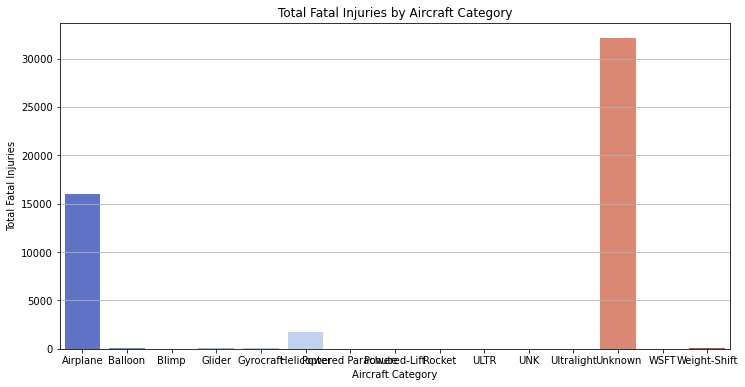

In [60]:
# Total Fatal injuries by Aircraft Category 

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fatal_injuries_by_category, x='Aircraft.Category', y='Total.Fatal.Injuries', palette='coolwarm')
plt.title('Total Fatal Injuries by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')
plt.grid(axis='y')
plt.show()

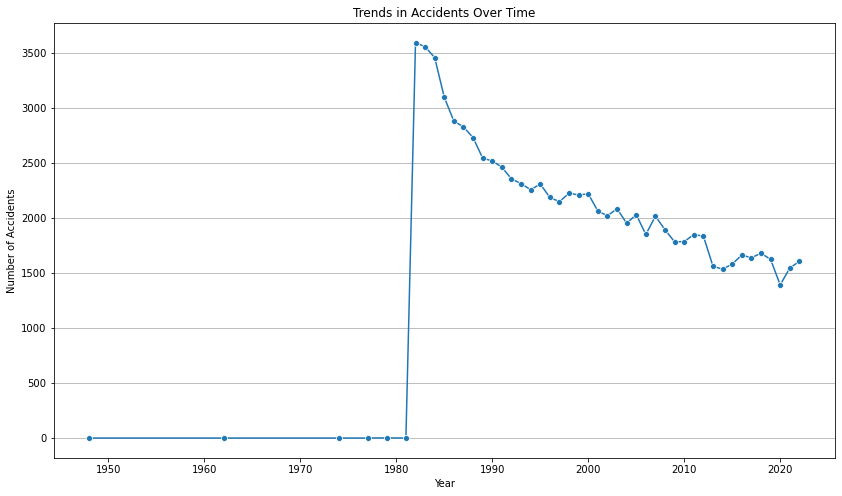

In [59]:
# Trends in Accidents Over Time 

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=accidents_per_year, x='Year', y='Number of Accidents', marker='o')
plt.title('Trends in Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

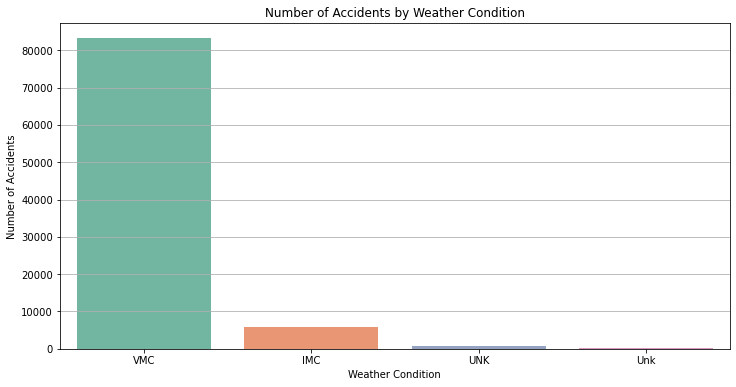

In [57]:
# Weather Conditions Impact on Accidents

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_accidents, x='Weather Condition', y='Number of Accidents', palette='Set2')
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

In [78]:
# Save the DataFrame to a CSV file
Aviation_df_clean.to_csv('Aviation_Data_cleaned.csv')